In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### One Sample Vectorization

In [152]:
data = np.genfromtxt('data.csv', delimiter=',')
N = 4

In [153]:
areas = data[:,0].reshape(N,1)
prices = data[:,1].reshape(N,)
print('areas: \n', areas)

areas: 
 [[6.7]
 [4.6]
 [3.5]
 [5.5]]


In [154]:
features = np.hstack([np.ones((N,1)),areas])
print('features: \n', features)
print('prices: \n', prices)

features: 
 [[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
prices: 
 [9.1 5.9 4.6 6.7]


In [155]:
# [b w]
theta = np.array([0.049,-0.34])
print('theta: \n',theta)

theta: 
 [ 0.049 -0.34 ]


In [156]:
def predict(x,theta):
    return np.dot(x.T,theta)

def compute_loss(y_hat,y):
    return (y_hat-y)**2

def derivative(x_feature,y,y_hat):
    k = np.dot(2,x_feature)
    return k*(y_hat-y)

def update(theta,lr,gradient):
    return theta - lr*gradient

In [157]:

lr = 0.01
epoch_max = 10
losses = []

for epoch in range(epoch_max):    
    for i in range(N):        
        x = features[i,:]
        y = prices[i]
        
        y_hat = predict(x, theta)

        loss = (y_hat-y)*(y_hat-y)
        losses.append(loss)
        
        dtheta = derivative(x,y,y_hat)

        theta = update(theta, lr, dtheta)
print('theta: \n', theta)

theta: 
 [0.2335058  1.21100306]


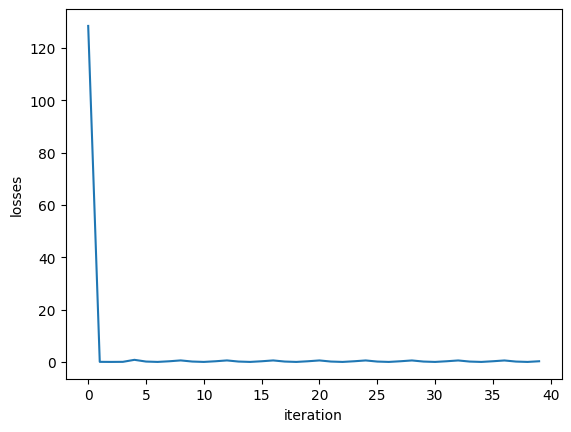

In [158]:
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

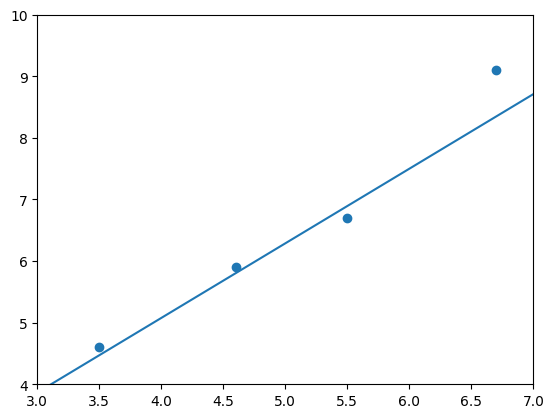

In [159]:
x_data = range(2,8)
predict_b,predict_w = theta
y_data = [x*predict_w+predict_b for x in x_data]

plt.plot(x_data, y_data)
plt.scatter(areas, prices)
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

### m Sample Vectorization

In [160]:
def predict(x,theta):
    return np.dot(theta.T,x)

def compute_loss(y_hat,y):
    return (y_hat-y.T).dot((y_hat-y.T).T)

def compute_gradient(x_feature,y_hat,y):
    k = 2*(y_hat-y)
    return np.dot(x_feature,k.T)

In [161]:
X = np.array([[6.7,4.6],[1,1]])
y = np.array([9.1,5.9])
theta = np.array([-0.34,0.049])

In [162]:
y_hat = predict(X,theta)
y_hat

array([-2.229, -1.515])

In [163]:
loss = compute_loss(y_hat,y)
loss/2

91.66423300000002

In [164]:
gradient = compute_gradient(X,y_hat,y)
gradient

array([-220.0266,  -37.488 ])

<class 'numpy.ndarray'>
areas: 
 [6.7 4.6 3.5 5.5]
prices: 
 [[9.1]
 [5.9]
 [4.6]
 [6.7]]
data_size:  4


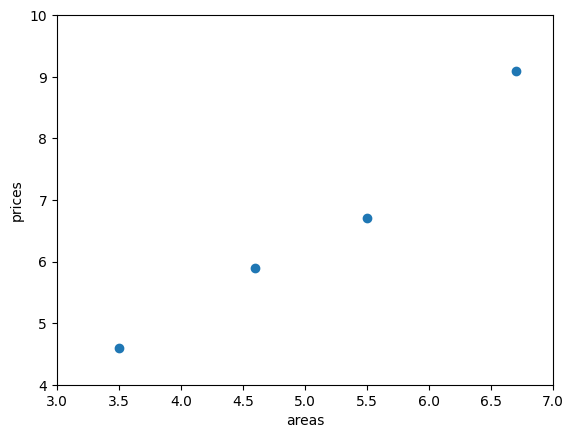

In [165]:
data = np.genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

print(type(areas))
print('areas: \n', areas)
print('prices: \n', prices)
print('data_size: ', N)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [166]:
data = np.vstack([areas,np.ones((N,))])
print('data \n', data)

theta = np.array([[-0.34], [0.04]]) #[w, b]
print('theta \n', theta)
print(theta.shape)

data 
 [[6.7 4.6 3.5 5.5]
 [1.  1.  1.  1. ]]
theta 
 [[-0.34]
 [ 0.04]]
(2, 1)


In [171]:
lr = 0.01
epoch = 20
m = 2
losses = []

for i in range(epoch):
    for j in range(0,N,m):
        x = data[:, j:j+m]
        y = prices[j:j+m, :]
        y_hat = predict(x,theta)
        
        loss = compute_loss(y_hat,y)
        losses.append(loss/m)
        gradient = compute_gradient(x,y_hat,y)
        
        theta = theta - lr*gradient/m
        

ValueError: x and y can be no greater than 2D, but have shapes (40,) and (40, 2, 2)

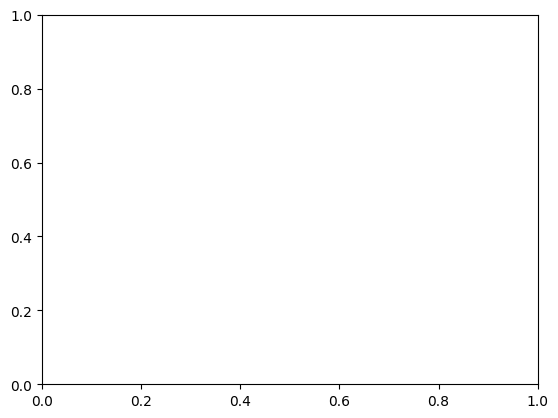

In [172]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [168]:
data   = np.genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
N = areas.size

# vector [x, b]^T
data = np.vstack([areas, np.ones((N,))])

 # [w, b]
theta = np.array([[-0.34], 
                  [0.04]])
                  
# params
lr = 0.01
epoch_max = 20
m = 2 

# logging
losses = [] 

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        print(y)

[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
[[9.1]
 [5.9]]
[[4.6]
 [6.7]]
